In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import dataset csv file

df = pd.read_csv('../datasets/Algerian_forest_fires_dataset_UPDATE.csv')

df.head()



,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


# Preprocessing

In [3]:
df.drop(['year'], axis=1, inplace=True)
df.drop(['day'], axis=1, inplace=True)

df.head()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [4]:
# check month column unique values

df['month'].value_counts()

month
7    62
8    62
6    60
9    60
Name: count, dtype: int64

### Classes Column

In [5]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               5
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [6]:
# strip the whitespace from classes column

df['Classes'] = df['Classes'].str.strip()

df['Classes'].value_counts()

Classes
fire        138
not fire    106
Name: count, dtype: int64

In [7]:
# check for missing values

df.isnull().sum()






month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [8]:
# drop null values

df.dropna(inplace=True)
df.isnull().sum()

month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [9]:
df.head()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [10]:

# Mapping 'fire' to 1 and 'not fire' to 0
df['Classes'] = df['Classes'].map({'fire': 1, 'not fire': 0}).astype(int)

df.head()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


<Figure size 1000x600 with 0 Axes>

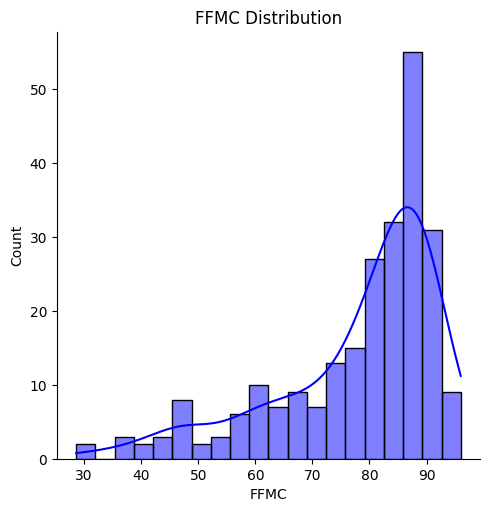

count    244.000000
mean      77.887705
std       14.337571
min       28.600000
25%       72.075000
50%       83.500000
75%       88.300000
max       96.000000
Name: FFMC, dtype: float64
Skewness: -1.3256332623474232


In [11]:
# Now lets check FFMC column
# plot the FFMC column
plt.figure(figsize=(10, 6))
sns.displot(df['FFMC'], bins=20,kde=True, color='blue')
plt.title('FFMC Distribution')
plt.show()

# describe the FFMC column
print(df['FFMC'].describe())


# Check the Skweness of the FFMC column

print('Skewness:', df['FFMC'].skew())

<Figure size 1000x600 with 0 Axes>

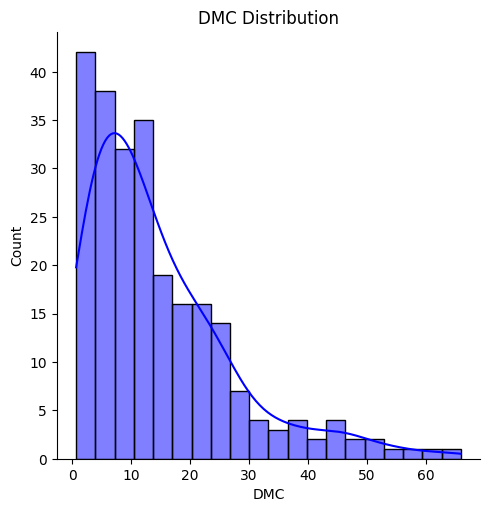

Skewness: 1.5276523856829873


In [12]:
#lets check the Distribution of the DMC column
plt.figure(figsize=(10, 6))
sns.displot(df['DMC'], bins=20,kde=True, color='blue')
plt.title('DMC Distribution')
plt.show()


# Check the Skweness of the FFMC column

print('Skewness:', df['DMC'].skew())

<Figure size 1000x600 with 0 Axes>

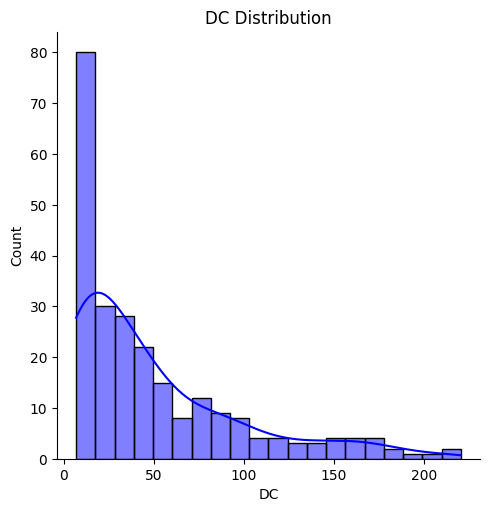

count    244.000000
mean      49.288115
std       47.619662
min        6.900000
25%       13.275000
50%       33.100000
75%       68.150000
max      220.400000
Name: DC, dtype: float64
Skewness: 1.4790416655754204


In [13]:
#lets check the Distribution of the DC column
plt.figure(figsize=(10, 6))
sns.displot(df['DC'], bins=20,kde=True, color='blue')
plt.title('DC Distribution')
plt.show()


#Describe the DC column
print(df['DC'].describe())

# Check the Skweness of the DC column

print('Skewness:', df['DC'].skew())

<Figure size 1000x600 with 0 Axes>

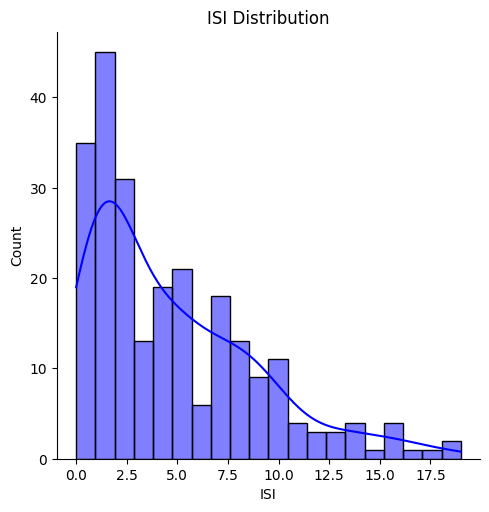

count    244.000000
mean       4.759836
std        4.154628
min        0.000000
25%        1.400000
50%        3.500000
75%        7.300000
max       19.000000
Name: ISI, dtype: float64
Skewness: 1.126950083256234


In [14]:
#lets check the Distribution of the ISI column
plt.figure(figsize=(10, 6))
sns.displot(df['ISI'], bins=20,kde=True, color='blue')
plt.title('ISI Distribution')
plt.show()


#Describe the ISI column
print(df['ISI'].describe())

# Check the Skweness of the ISI column

print('Skewness:', df['ISI'].skew())

<Figure size 1000x600 with 0 Axes>

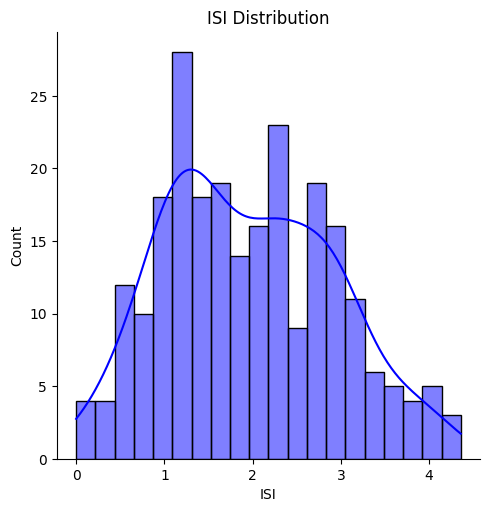

Skewness: 0.25212473558794934


In [15]:
#skewed ISI, lets apply sqrt transformation to reduce the skewness

df['ISI'] =np.sqrt(df['ISI'] )

#lets check the Distribution of the ISI column
plt.figure(figsize=(10, 6))
sns.displot(df['ISI'], bins=20,kde=True, color='blue')
plt.title('ISI Distribution')
plt.show()

# Check the Skweness of the ISI column

print('Skewness:', df['ISI'].skew())

<Figure size 1000x600 with 0 Axes>

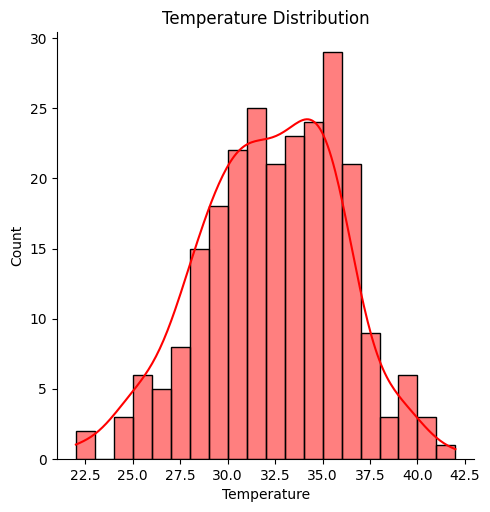

Skewness: -0.19630887951190434


In [16]:
#lets check the Distribution of the temp column
plt.figure(figsize=(10, 6))
sns.displot(df['Temperature'], bins=20,kde=True, color='red')
plt.title('Temperature Distribution')
plt.show()


# Check the Skweness of the temp column

print('Skewness:', df['Temperature'].skew())


<Figure size 1000x600 with 0 Axes>

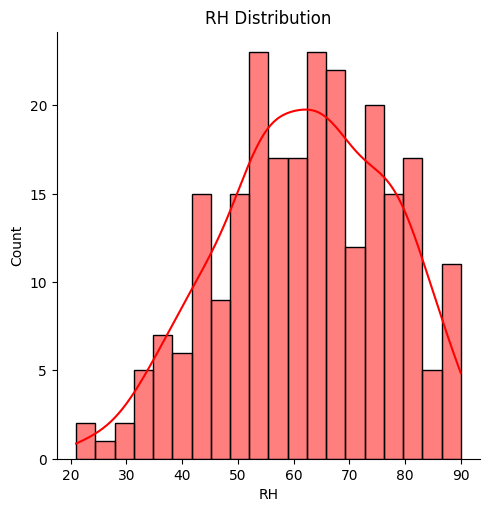

Skewness: -0.23796439326918462


In [17]:
#lets check the Distribution of the RH column
plt.figure(figsize=(10, 6))
sns.displot(df['RH'], bins=20,kde=True, color='red')
plt.title('RH Distribution')
plt.show()


# Check the Skweness of the RH column

print('Skewness:', df['RH'].skew()) 

<Figure size 1000x600 with 0 Axes>

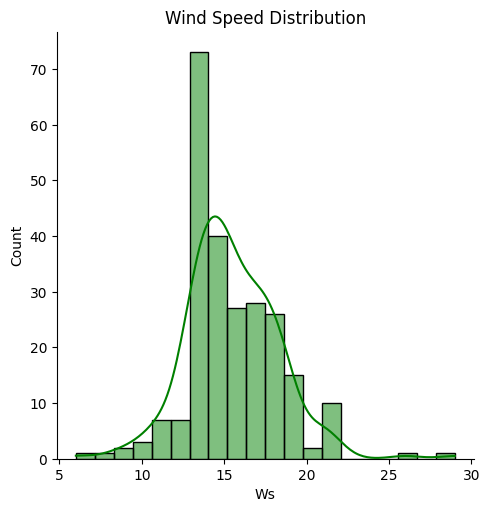

Skewness: 0.5458812499001592


In [18]:
#lets check the Distribution of the wind column
plt.figure(figsize=(10, 6))
sns.displot(df['Ws'], bins=20,kde=True, color='green')
plt.title('Wind Speed Distribution')
plt.show()


# Check the Skweness of the wind column

print('Skewness:', df['Ws'].skew())

<Figure size 1000x600 with 0 Axes>

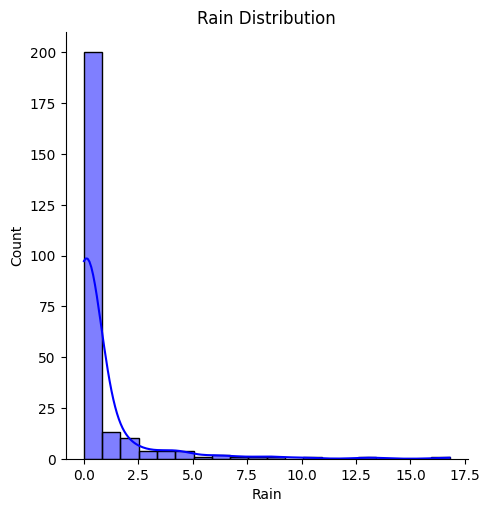

Skewness: 4.57907059640398


In [19]:
#lets check the Distribution of the rain column

plt.figure(figsize=(10, 6))
sns.displot(df['Rain'], bins=20,kde=True, color='blue')
plt.title('Rain Distribution')
plt.show()


# Check the Skweness of the rain column

print('Skewness:', df['Rain'].skew())

<Figure size 1000x600 with 0 Axes>

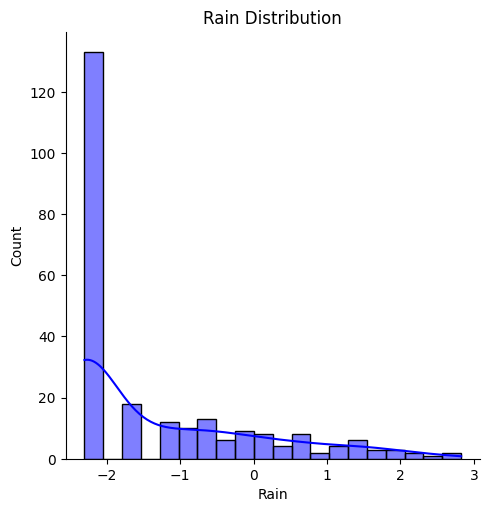

Skewness: 1.2048211990322968


In [20]:
#Very skewed, lets apply sqrt transformation to reduce the skewness
# try to apply yeo-johnson transformation
from scipy.stats import yeojohnson, skew


df['Rain'] = np.log(df['Rain'] + 0.1)


#lets check the Distribution of the rain column
plt.figure(figsize=(10, 6))
sns.displot(df['Rain'], bins=20,kde=True, color='blue')
plt.title('Rain Distribution')
plt.show()

# Check the Skweness of the rain column

print('Skewness:', df['Rain'].skew())


<Figure size 1000x600 with 0 Axes>

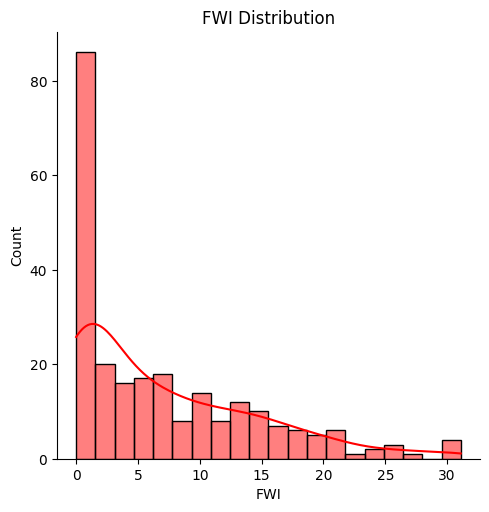

Skewness: 1.1386389310423435


In [21]:
#lets check the Distribution of the RH column
plt.figure(figsize=(10, 6))
sns.displot(df['FWI'], bins=20,kde=True, color='red')
plt.title('FWI Distribution')
plt.show()


# Check the Skweness of the RH column

print('Skewness:', df['FWI'].skew()) 

In [22]:
# check value count of fwi column

df['FWI'].value_counts()


FWI
0.4     12
0.8     10
0.5      9
0.1      9
0.0      9
        ..
30.2     1
20.3     1
22.3     1
20.4     1
6.5      1
Name: count, Length: 126, dtype: int64

In [23]:
df.head()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,6,29,57,18,-2.302585,65.7,3.4,7.6,1.140175,3.4,0.5,0
1,6,29,61,13,0.336472,64.4,4.1,7.6,1.000000,3.9,0.4,0
2,6,26,82,22,2.580217,47.1,2.5,7.1,0.547723,2.7,0.1,0
3,6,25,89,13,0.955511,28.6,1.3,6.9,0.000000,1.7,0.0,0
4,6,27,77,16,-2.302585,64.8,3.0,14.2,1.095445,3.9,0.5,0


In [24]:
# Rename the area column to fire
df.rename(columns={'Classes': 'Fire'}, inplace=True)
df.head()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Fire
0,6,29,57,18,-2.302585,65.7,3.4,7.6,1.140175,3.4,0.5,0
1,6,29,61,13,0.336472,64.4,4.1,7.6,1.000000,3.9,0.4,0
2,6,26,82,22,2.580217,47.1,2.5,7.1,0.547723,2.7,0.1,0
3,6,25,89,13,0.955511,28.6,1.3,6.9,0.000000,1.7,0.0,0
4,6,27,77,16,-2.302585,64.8,3.0,14.2,1.095445,3.9,0.5,0


In [40]:
df['Fire'].value_counts()

Fire
1    138
0    106
Name: count, dtype: int64

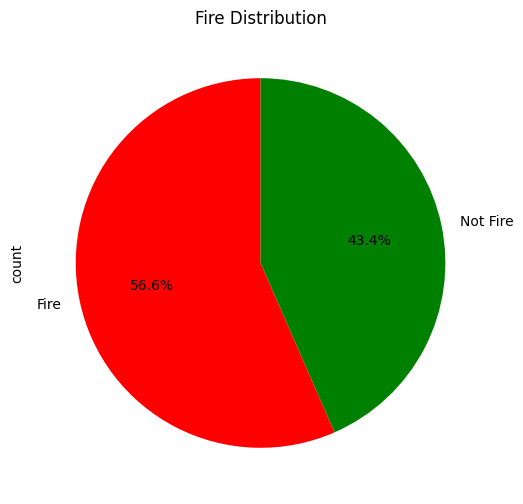

In [39]:
# generate piechart for fire column

plt.figure(figsize=(10, 6))

df['Fire'].value_counts().plot.pie(autopct='%1.1f%%', colors=['red', 'green'], startangle=90, labels=['Fire', 'Not Fire'])

plt.title('Fire Distribution')
plt.show()


In [25]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X = df.drop('Fire', axis=1)
y = df['Fire']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Models

In [26]:
# RandomForest Model Building and Training 

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)



# Model Evaluation



from sklearn.model_selection import cross_val_score


# Perform K-Fold cross-validation, typically using 5 or 10 folds
scores = cross_val_score(rf, X, y, cv=5)  # You can adjust the number of folds with the cv parameter

# Print the results
print("Accuracy scores for each fold: ", scores)
print("Mean cross-validation score: ", np.mean(scores))
print("Standard deviation of the scores: ", np.std(scores))

Accuracy scores for each fold:  [0.97959184 0.91836735 1.         1.         1.        ]
Mean cross-validation score:  0.9795918367346939
Standard deviation of the scores:  0.03161619058128503


In [27]:
# Decision Tree Model Building and Training

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, )

# Perform K-Fold cross-validation, typically using 5 or 10 folds
scores = cross_val_score(dt, X, y, cv=5)  # You can adjust the number of folds with the cv parameter

# Print the results
print("Accuracy scores for each fold: ", scores)
print("Mean cross-validation score: ", np.mean(scores))
print("Standard deviation of the scores: ", np.std(scores))


Accuracy scores for each fold:  [0.97959184 0.91836735 0.91836735 1.         0.97916667]
Mean cross-validation score:  0.9590986394557823
Standard deviation of the scores:  0.03409895753664388


In [28]:
# Logistic Regression Model Building and Training

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42, max_iter=1000)


# Perform K-Fold cross-validation, typically using 5 or 10 folds
scores = cross_val_score(lr, X, y, cv=5)  # You can adjust the number of folds with the cv parameter

# Print the results
print("Accuracy scores for each fold: ", scores)
print("Mean cross-validation score: ", np.mean(scores))
print("Standard deviation of the scores: ", np.std(scores))


Accuracy scores for each fold:  [0.97959184 0.93877551 0.93877551 0.97959184 0.95833333]
Mean cross-validation score:  0.9590136054421767
Standard deviation of the scores:  0.01825678489839404


In [29]:
# KNN Model Building and Training

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# Perform K-Fold cross-validation, typically using 5 or 10 folds
scores = cross_val_score(knn, X, y, cv=5)  # You can adjust the number of folds with the cv parameter

# Print the results
print("Accuracy scores for each fold: ", scores)
print("Mean cross-validation score: ", np.mean(scores))
print("Standard deviation of the scores: ", np.std(scores))

Accuracy scores for each fold:  [0.89795918 0.83673469 0.87755102 0.95918367 0.89583333]
Mean cross-validation score:  0.8934523809523809
Standard deviation of the scores:  0.039538164639343114


In [30]:
# SVM Model Building and Training

from sklearn.svm import SVC

svm = SVC(random_state=42)

# Perform K-Fold cross-validation, typically using 5 or 10 folds
scores = cross_val_score(svm, X, y, cv=5)  # You can adjust the number of folds with the cv parameter

# Print the results
print("Accuracy scores for each fold: ", scores)
print("Mean cross-validation score: ", np.mean(scores))
print("Standard deviation of the scores: ", np.std(scores))

Accuracy scores for each fold:  [0.91836735 0.83673469 0.83673469 0.95918367 0.875     ]
Mean cross-validation score:  0.8852040816326532
Standard deviation of the scores:  0.04769794241844994


In [31]:
# Gradient Boosting Model Building and Training

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Perform K-Fold cross-validation, typically using 5 or 10 folds
scores = cross_val_score(gb, X, y, cv=5)  # You can adjust the number of folds with the cv parameter

# Print the results
print("Accuracy scores for each fold: ", scores)
print("Mean cross-validation score: ", np.mean(scores))
print("Standard deviation of the scores: ", np.std(scores))

Accuracy scores for each fold:  [0.93877551 0.91836735 1.         1.         0.97916667]
Mean cross-validation score:  0.9672619047619048
Standard deviation of the scores:  0.03312836118877467


In [32]:
# XGBoost Model Building and Training

from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, random_state=42)

# Perform K-Fold cross-validation, typically using 5 or 10 folds
scores = cross_val_score(xgb, X, y, cv=5)  # You can adjust the number of folds with the cv parameter

# Print the results
print("Accuracy scores for each fold: ", scores)
print("Mean cross-validation score: ", np.mean(scores))
print("Standard deviation of the scores: ", np.std(scores))


Accuracy scores for each fold:  [0.97959184 0.93877551 1.         1.         0.97916667]
Mean cross-validation score:  0.9795068027210885
Standard deviation of the scores:  0.022356669621612854


In [33]:
# Bagging Model Building and Training

from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(n_estimators=100, random_state=42)

# Perform K-Fold cross-validation, typically using 5 or 10 folds
scores = cross_val_score(bag, X, y, cv=5)  # You can adjust the number of folds with the cv parameter

# Print the results
print("Accuracy scores for each fold: ", scores)
print("Mean cross-validation score: ", np.mean(scores))
print("Standard deviation of the scores: ", np.std(scores))

Accuracy scores for each fold:  [0.97959184 0.93877551 1.         1.         0.97916667]
Mean cross-validation score:  0.9795068027210885
Standard deviation of the scores:  0.022356669621612854


In [34]:
# Naive Bayes Model Building and Training

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()


# Perform K-Fold cross-validation, typically using 5 or 10 folds
scores = cross_val_score(nb, X, y, cv=5)  # You can adjust the number of folds with the cv parameter

# Print the results
print("Accuracy scores for each fold: ", scores)
print("Mean cross-validation score: ", np.mean(scores))
print("Standard deviation of the scores: ", np.std(scores))

Accuracy scores for each fold:  [0.89795918 0.91836735 0.91836735 1.         0.89583333]
Mean cross-validation score:  0.9261054421768706
Standard deviation of the scores:  0.03818055618578316


In [35]:
# Voting Model Building and Training

from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[
    ('rf', rf),
    ('dt', dt),
    ('lr', lr),
    ('knn', knn),
    ('gb', gb),
    ('xgb', xgb),
    ('bag', bag),
    ('nb', nb),
    ], voting='soft', verbose=True)


# Perform K-Fold cross-validation, typically using 5 or 10 folds
scores = cross_val_score(voting, X, y, cv=5)  # You can adjust the number of folds with the cv parameter

# Print the results
print("Accuracy scores for each fold: ", scores)
print("Mean cross-validation score: ", np.mean(scores))
print("Standard deviation of the scores: ", np.std(scores))


[Voting] ....................... (1 of 8) Processing rf, total=   0.1s
[Voting] ....................... (2 of 8) Processing dt, total=   0.0s
[Voting] ....................... (3 of 8) Processing lr, total=   0.1s
[Voting] ...................... (4 of 8) Processing knn, total=   0.0s
[Voting] ....................... (5 of 8) Processing gb, total=   0.1s
[Voting] ...................... (6 of 8) Processing xgb, total=   0.0s
[Voting] ...................... (7 of 8) Processing bag, total=   0.2s
[Voting] ....................... (8 of 8) Processing nb, total=   0.0s
[Voting] ....................... (1 of 8) Processing rf, total=   0.2s
[Voting] ....................... (2 of 8) Processing dt, total=   0.0s
[Voting] ....................... (3 of 8) Processing lr, total=   0.1s
[Voting] ...................... (4 of 8) Processing knn, total=   0.0s
[Voting] ....................... (5 of 8) Processing gb, total=   0.1s
[Voting] ...................... (6 of 8) Processing xgb, total=   0.0s
[Votin

In [36]:
# check for missing values

df.isnull().sum()






month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Fire           0
dtype: int64

In [37]:

import itertools
from joblib import Parallel, delayed

# Assume rf, dt, lr, knn, gb, xgb, bag, nb are already defined as classifiers.
classifiers = {
    'rf': rf,
    'dt': dt,
    'lr': lr,
    'knn': knn,
    'gb': gb,
    'xgb': xgb,
    'bag': bag,
    'nb': nb
}

def evaluate_combination(combo):
    # Check if the combo is a tuple (single classifier case)
    if isinstance(combo[0], tuple):
        names, models = zip(*combo)
    else:
        names, models = (combo[0],), (combo[1],)  # single classifier
    
    voting = VotingClassifier(estimators=list(zip(names, models)), voting='hard', verbose=True)
    scores = cross_val_score(voting, X, y, cv=5)
    mean_score = np.mean(scores)
    std_dev = np.std(scores)
    return {'names': names, 'mean_score': mean_score, 'scores': scores, 'std_dev': std_dev}

# Using joblib's Parallel and delayed to handle multiprocessing
results = Parallel(n_jobs=-1)(
    delayed(evaluate_combination)(combo)
    for size in range(1, len(classifiers) + 1)  # Now starting from 1 to include single classifiers
    for combo in itertools.combinations(classifiers.items(), size)
)

# Sort results by mean score in descending order
sorted_results = sorted(results, key=lambda x: x['mean_score'], reverse=True)

# Print sorted results
for result in sorted_results:
    print(f"Combination: {', '.join(result['names'])}")
    print(f"Accuracy scores for each fold: {result['scores']}")
    print(f"Mean cross-validation score: {result['mean_score']}")
    print(f"Standard deviation of the scores: {result['std_dev']}")
    print()

# Optionally, print the best combination directly from the sorted list
if sorted_results:
    best_result = sorted_results[0]
    print(f"Best combination: {', '.join(best_result['names'])}")
    print(f"Best mean cross-validation score: {best_result['mean_score']}")



Combination: rf, knn, xgb
Accuracy scores for each fold: [0.97959184 0.93877551 1.         1.         1.        ]
Mean cross-validation score: 0.9836734693877551
Standard deviation of the scores: 0.02379980365242978

Combination: rf, knn, bag
Accuracy scores for each fold: [0.97959184 0.93877551 1.         1.         1.        ]
Mean cross-validation score: 0.9836734693877551
Standard deviation of the scores: 0.02379980365242978

Combination: rf, dt, knn, xgb, bag
Accuracy scores for each fold: [0.97959184 0.93877551 1.         1.         1.        ]
Mean cross-validation score: 0.9836734693877551
Standard deviation of the scores: 0.02379980365242978

Combination: rf, lr, knn, xgb, bag
Accuracy scores for each fold: [0.97959184 0.93877551 1.         1.         1.        ]
Mean cross-validation score: 0.9836734693877551
Standard deviation of the scores: 0.02379980365242978

Combination: rf, knn, gb, xgb, bag
Accuracy scores for each fold: [0.97959184 0.93877551 1.         1.         1. 

#### We Choose the Combination: rf, knn, xgb that has the Highest Mean CV Score

In [38]:
# Train the best model

# Voting Model Building and Training

best_voting = VotingClassifier(estimators=[
    ('rf', rf),
    ('knn', knn),
    ('xgb', xgb),
    ], voting='hard', verbose=True)

# Fit the model using the whole dataset

best_voting.fit(X, y)

from joblib import dump


dump(best_voting, 'voting_classifier.joblib')



[Voting] ....................... (1 of 3) Processing rf, total=   0.1s
[Voting] ...................... (2 of 3) Processing knn, total=   0.0s
[Voting] ...................... (3 of 3) Processing xgb, total=   0.0s


['voting_classifier.joblib']